In [1]:


import sys

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ast
from sklearn.manifold import TSNE
import umap

In [2]:
import matplotlib as mpl

In [3]:
dfname="CRC_and_healthy_epcam.txt"#"CRC_and_healthy"#sys.argv[1]
neddtotransposed=True#sys.argv[2] #True/False
correspondingDict="CRC_Mel_and_healthy_dict.txt"#sys.argv[3] #file with dict
whichdecomp="PCA"#sys.argv[4] # PCA #tSNE #"UMAP"
CRC_tumor_ratio_dict="CRC_Mel_and_healthy_dict_crc_tumor_size_ratio.txt"


In [4]:

############################# PCA ############################
def pca_comp(stdData):
	pca = PCA()
	principalComponents = pca.fit_transform(stdData)
	return principalComponents



####################tsne###############
def tsne_comp(stdData):
	tsne = TSNE(random_state=100)
	principalComponents = tsne.fit_transform(stdData)
	return principalComponents


####################umap###############
def umap_comp(stdData):
	um = umap.UMAP(random_state=100)
	principalComponents = um.fit_transform(stdData)
	return principalComponents


In [5]:
import pandas as pd
pdData=pd.read_csv(dfname,sep="\t",index_col=0)
pdData

,med-1291-cfDNA.bg,med-1292-cfDNA.bg,med-1300-cfDNA.bg,med-1309-cfDNA.bg,med-1314-cfDNA.bg,med-1320-cfDNA.bg,med-1321-cfDNA.bg,med-1336-cfDNA.bg,med-1339-cfDNA.bg,med-1357-cfDNA.bg,...,med-H3-cfDNA.bg,med-H4-cfDNA.bg,tot-66-cfDNA.bg,tot-67-cfDNA.bg,tot-72-cfDNA.bg,tot-PH1-cfDNA.bg,tot-PH16-cfDNA.bg,tot-PH17-cfDNA.bg,tot-PH4-cfDNA.bg,tot-PH7-cfDNA.bg
position,,,,,,,,,,,,,,,,,,,,,
chr20:63006477,NaN,0.0,33.0,33.0,NaN,NaN,19.9,NaN,NaN,20.0,...,0.0,0.0,NaN,NaN,0.0,0.0,14.5,0.0,0.0,NaN
chr17:82449503,57.1,0.0,43.0,0.0,0.0,0.0,18.9,0.0,0.0,28.6,...,16.7,0.0,0.0,0.0,0.0,0.0,9.9,0.0,11.5,16.7
chr20:63006479,NaN,0.0,33.0,33.0,NaN,NaN,36.4,NaN,NaN,24.7,...,0.0,0.0,NaN,NaN,0.0,0.0,9.1,0.0,0.0,NaN
chr9:69120228,39.8,7.5,0.0,12.5,0.0,50.0,6.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.9,18.5,13.2,7.5
chr20:63006507,50.0,0.0,20.0,0.0,NaN,NaN,16.5,NaN,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,8.9,0.0,0.0,NaN
chr6:107634947,33.3,0.0,50.0,NaN,NaN,NaN,11.1,0.0,NaN,20.0,...,0.0,33.3,NaN,NaN,20.0,0.0,0.0,0.0,33.5,NaN
chr16:4701806,30.2,7.6,19.8,12.4,NaN,66.7,50.4,NaN,0.0,0.0,...,28.7,0.0,0.0,NaN,8.3,6.2,8.0,33.3,14.9,10.0
chr8:141971925,0.0,0.0,0.0,14.3,25.0,18.4,14.3,39.8,14.1,36.1,...,14.1,0.0,0.0,9.8,0.0,18.2,18.5,0.0,7.8,12.7
chr17:73447621,37.5,0.0,0.0,20.0,NaN,0.0,5.8,0.0,0.0,28.4,...,50.0,0.0,0.0,NaN,0.0,0.0,14.1,0.0,0.0,0.0


In [6]:
if neddtotransposed==True:
    pdData=pdData.transpose()
    transfilename=dfname+"_transposed.txt"
    pdData.to_csv(transfilename,sep="\t",na_rep="NaN")

In [7]:
file = open(correspondingDict, "r")
contents = file.read()
dictionary = ast.literal_eval(contents)

pdData["Target"] = pd.Series(dictionary)

In [8]:
tumorratiofile = open(CRC_tumor_ratio_dict, "r")
content_tumorratio = tumorratiofile.read()
tumorratio_dictionary = ast.literal_eval(content_tumorratio)

pdData["TumorRatio"] = pd.Series(tumorratio_dictionary)

In [9]:
pdData

position,chr20:63006477,chr17:82449503,chr20:63006479,chr9:69120228,chr20:63006507,chr6:107634947,chr16:4701806,chr8:141971925,chr17:73447621,chr1:90296491,...,chr14:33557707,chr12:131696109,chr19:57585191,chr10:84416879,chr6:108454890,chr10:5753667,chr7:194736,chr7:36660521,Target,TumorRatio
med-1291-cfDNA.bg,NaN,57.1,NaN,39.8,50.0,33.3,30.2,0.0,37.5,0.0,...,67.0,33.3,NaN,0.0,37.8,12.5,41.7,100.0,CRC,3.26471
med-1292-cfDNA.bg,0.0,0.0,0.0,7.5,0.0,0.0,7.6,0.0,0.0,0.0,...,33.7,0.0,12.5,0.0,8.5,0.0,9.1,16.3,CRC,0
med-1300-cfDNA.bg,33.0,43.0,33.0,0.0,20.0,50.0,19.8,0.0,0.0,0.0,...,0.0,0.0,15.1,0.0,0.0,15.4,0.0,11.5,CRC,0.135802
med-1309-cfDNA.bg,33.0,0.0,33.0,12.5,0.0,NaN,12.4,14.3,20.0,11.1,...,0.0,0.0,0.0,10.0,0.0,0.0,38.5,0.0,CRC,1.31944
med-1314-cfDNA.bg,NaN,0.0,NaN,0.0,NaN,NaN,NaN,25.0,NaN,0.0,...,0.0,0.0,50.0,0.0,0.0,0.0,NaN,25.0,CRC,1.09091
med-1320-cfDNA.bg,NaN,0.0,NaN,50.0,NaN,NaN,66.7,18.4,0.0,10.9,...,14.3,0.0,0.0,0.0,25.0,0.0,40.0,0.0,CRC,1
med-1321-cfDNA.bg,19.9,18.9,36.4,6.7,16.5,11.1,50.4,14.3,5.8,11.0,...,15.3,0.0,13.2,0.0,0.0,5.5,31.4,31.4,CRC,0.688742
med-1336-cfDNA.bg,NaN,0.0,NaN,0.0,NaN,0.0,NaN,39.8,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,CRC,0
med-1339-cfDNA.bg,NaN,0.0,NaN,0.0,NaN,NaN,0.0,14.1,0.0,0.0,...,0.0,0.0,16.5,0.0,0.0,0.0,0.0,0.0,CRC,0
med-1357-cfDNA.bg,20.0,28.6,24.7,0.0,0.0,20.0,0.0,36.1,28.4,0.0,...,0.0,66.7,0.0,0.0,0.0,0.0,37.5,0.0,CRC,1.32


In [10]:
pdData.loc[:, pdData.columns != "Target"]=pdData.groupby("Target").transform(lambda x: x.fillna(x.mean()))
pdData

position,chr20:63006477,chr17:82449503,chr20:63006479,chr9:69120228,chr20:63006507,chr6:107634947,chr16:4701806,chr8:141971925,chr17:73447621,chr1:90296491,...,chr14:33557707,chr12:131696109,chr19:57585191,chr10:84416879,chr6:108454890,chr10:5753667,chr7:194736,chr7:36660521,Target,TumorRatio
med-1291-cfDNA.bg,18.920000,57.1,27.577778,39.80,50.000000,33.300000,30.200000,0.0,37.500000,0.0,...,67.0,33.30000,11.75625,0.0,37.8,12.50000,41.700000,100.0,CRC,3.264706
med-1292-cfDNA.bg,0.000000,0.0,0.000000,7.50,0.000000,0.000000,7.600000,0.0,0.000000,0.0,...,33.7,0.00000,12.50000,0.0,8.5,0.00000,9.100000,16.3,CRC,0.000000
med-1300-cfDNA.bg,33.000000,43.0,33.000000,0.00,20.000000,50.000000,19.800000,0.0,0.000000,0.0,...,0.0,0.00000,15.10000,0.0,0.0,15.40000,0.000000,11.5,CRC,0.135802
med-1309-cfDNA.bg,33.000000,0.0,33.000000,12.50,0.000000,17.736364,12.400000,14.3,20.000000,11.1,...,0.0,0.00000,0.00000,10.0,0.0,0.00000,38.500000,0.0,CRC,1.319444
med-1314-cfDNA.bg,18.920000,0.0,27.577778,0.00,19.966667,17.736364,18.253333,25.0,13.431250,0.0,...,0.0,0.00000,50.00000,0.0,0.0,0.00000,22.212500,25.0,CRC,1.090909
med-1320-cfDNA.bg,18.920000,0.0,27.577778,50.00,19.966667,17.736364,66.700000,18.4,0.000000,10.9,...,14.3,0.00000,0.00000,0.0,25.0,0.00000,40.000000,0.0,CRC,1.000000
med-1321-cfDNA.bg,19.900000,18.9,36.400000,6.70,16.500000,11.100000,50.400000,14.3,5.800000,11.0,...,15.3,0.00000,13.20000,0.0,0.0,5.50000,31.400000,31.4,CRC,0.688742
med-1336-cfDNA.bg,18.920000,0.0,27.577778,0.00,19.966667,0.000000,18.253333,39.8,0.000000,0.0,...,0.0,8.94375,0.00000,0.0,0.0,0.00000,0.000000,0.0,CRC,0.000000
med-1339-cfDNA.bg,18.920000,0.0,27.577778,0.00,19.966667,17.736364,0.000000,14.1,0.000000,0.0,...,0.0,0.00000,16.50000,0.0,0.0,0.00000,0.000000,0.0,CRC,0.000000
med-1357-cfDNA.bg,20.000000,28.6,24.700000,0.00,0.000000,20.000000,0.000000,36.1,28.400000,0.0,...,0.0,66.70000,0.00000,0.0,0.0,0.00000,37.500000,0.0,CRC,1.320000


In [11]:
Y=pdData["Target"].copy()
X=pdData.drop("Target",axis=1)
Xtumor=X["TumorRatio"].copy()
X=X.drop("TumorRatio",axis=1)

X

position,chr20:63006477,chr17:82449503,chr20:63006479,chr9:69120228,chr20:63006507,chr6:107634947,chr16:4701806,chr8:141971925,chr17:73447621,chr1:90296491,...,chr2:173854875,chr13:42985977,chr14:33557707,chr12:131696109,chr19:57585191,chr10:84416879,chr6:108454890,chr10:5753667,chr7:194736,chr7:36660521
med-1291-cfDNA.bg,18.920000,57.1,27.577778,39.80,50.000000,33.300000,30.200000,0.0,37.500000,0.0,...,17.7,40.000,67.0,33.30000,11.75625,0.0,37.8,12.50000,41.700000,100.0
med-1292-cfDNA.bg,0.000000,0.0,0.000000,7.50,0.000000,0.000000,7.600000,0.0,0.000000,0.0,...,0.0,18.400,33.7,0.00000,12.50000,0.0,8.5,0.00000,9.100000,16.3
med-1300-cfDNA.bg,33.000000,43.0,33.000000,0.00,20.000000,50.000000,19.800000,0.0,0.000000,0.0,...,0.0,6.900,0.0,0.00000,15.10000,0.0,0.0,15.40000,0.000000,11.5
med-1309-cfDNA.bg,33.000000,0.0,33.000000,12.50,0.000000,17.736364,12.400000,14.3,20.000000,11.1,...,0.0,33.300,0.0,0.00000,0.00000,10.0,0.0,0.00000,38.500000,0.0
med-1314-cfDNA.bg,18.920000,0.0,27.577778,0.00,19.966667,17.736364,18.253333,25.0,13.431250,0.0,...,17.0,0.000,0.0,0.00000,50.00000,0.0,0.0,0.00000,22.212500,25.0
med-1320-cfDNA.bg,18.920000,0.0,27.577778,50.00,19.966667,17.736364,66.700000,18.4,0.000000,10.9,...,24.7,0.000,14.3,0.00000,0.00000,0.0,25.0,0.00000,40.000000,0.0
med-1321-cfDNA.bg,19.900000,18.9,36.400000,6.70,16.500000,11.100000,50.400000,14.3,5.800000,11.0,...,5.8,33.100,15.3,0.00000,13.20000,0.0,0.0,5.50000,31.400000,31.4
med-1336-cfDNA.bg,18.920000,0.0,27.577778,0.00,19.966667,0.000000,18.253333,39.8,0.000000,0.0,...,0.0,18.875,0.0,8.94375,0.00000,0.0,0.0,0.00000,0.000000,0.0
med-1339-cfDNA.bg,18.920000,0.0,27.577778,0.00,19.966667,17.736364,0.000000,14.1,0.000000,0.0,...,24.7,0.000,0.0,0.00000,16.50000,0.0,0.0,0.00000,0.000000,0.0
med-1357-cfDNA.bg,20.000000,28.6,24.700000,0.00,0.000000,20.000000,0.000000,36.1,28.400000,0.0,...,28.9,19.800,0.0,66.70000,0.00000,0.0,0.0,0.00000,37.500000,0.0


In [12]:
Y

med-1291-cfDNA.bg        CRC
med-1292-cfDNA.bg        CRC
med-1300-cfDNA.bg        CRC
med-1309-cfDNA.bg        CRC
med-1314-cfDNA.bg        CRC
med-1320-cfDNA.bg        CRC
med-1321-cfDNA.bg        CRC
med-1336-cfDNA.bg        CRC
med-1339-cfDNA.bg        CRC
med-1357-cfDNA.bg        CRC
med-1358-cfDNA.bg        CRC
med-1361-cfDNA.bg        CRC
med-1387-cfDNA.bg        CRC
med-1423-cfDNA.bg        CRC
med-1506-cfDNA.bg        CRC
med-1519-cfDNA.bg        CRC
med-1537-cfDNA.bg        CRC
med-H1-cfDNA.bg      Healthy
med-H2-cfDNA.bg      Healthy
med-H3-cfDNA.bg      Healthy
med-H4-cfDNA.bg      Healthy
tot-66-cfDNA.bg      Healthy
tot-67-cfDNA.bg      Healthy
tot-72-cfDNA.bg      Healthy
tot-PH1-cfDNA.bg     Healthy
tot-PH16-cfDNA.bg    Healthy
tot-PH17-cfDNA.bg    Healthy
tot-PH4-cfDNA.bg     Healthy
tot-PH7-cfDNA.bg     Healthy
Name: Target, dtype: object

In [13]:
Xtumor

med-1291-cfDNA.bg    3.264706
med-1292-cfDNA.bg    0.000000
med-1300-cfDNA.bg    0.135802
med-1309-cfDNA.bg    1.319444
med-1314-cfDNA.bg    1.090909
med-1320-cfDNA.bg    1.000000
med-1321-cfDNA.bg    0.688742
med-1336-cfDNA.bg    0.000000
med-1339-cfDNA.bg    0.000000
med-1357-cfDNA.bg    1.320000
med-1358-cfDNA.bg    1.942675
med-1361-cfDNA.bg    0.496296
med-1387-cfDNA.bg    1.293333
med-1423-cfDNA.bg    0.972414
med-1506-cfDNA.bg    1.067961
med-1519-cfDNA.bg    0.943396
med-1537-cfDNA.bg    0.880000
med-H1-cfDNA.bg      0.000000
med-H2-cfDNA.bg      0.000000
med-H3-cfDNA.bg      0.000000
med-H4-cfDNA.bg      0.000000
tot-66-cfDNA.bg      0.000000
tot-67-cfDNA.bg      0.000000
tot-72-cfDNA.bg      0.000000
tot-PH1-cfDNA.bg     0.000000
tot-PH16-cfDNA.bg    0.000000
tot-PH17-cfDNA.bg    0.000000
tot-PH4-cfDNA.bg     0.000000
tot-PH7-cfDNA.bg     0.000000
Name: TumorRatio, dtype: float64

In [14]:
from sklearn import preprocessing
label_changer = preprocessing.LabelEncoder()
Y_num=label_changer.fit_transform(Y)

In [15]:
standardizedData= StandardScaler().fit_transform(X)

In [16]:
standardizedData

array([[ 5.29919920e-01,  2.14203312e+00,  6.90780512e-01,
         1.66419765e+00,  2.70966368e+00,  1.34838316e+00,
         8.58162880e-01, -8.95682436e-01,  1.82912795e+00,
        -6.50209504e-01,  3.91418408e-01,  2.65139183e+00,
         8.00370254e-01,  2.39426365e+00, -7.46572142e-01,
         1.04105761e+00,  1.65159641e+00,  2.53452917e+00,
         1.49301436e+00,  1.84681515e-01, -4.04235392e-01,
         2.21029807e+00,  1.49410233e+00,  1.62858501e+00,
         3.82652338e+00],
       [-8.69921820e-01, -7.24686869e-01, -1.04214155e+00,
        -2.56164455e-01, -8.66391965e-01, -1.23377145e+00,
        -5.30507087e-01, -8.95682436e-01, -8.45393230e-01,
        -6.50209504e-01, -6.66140645e-01, -6.90311380e-01,
        -3.49582472e-01, -3.83359947e-01,  1.65330101e+00,
        -8.69471065e-01,  2.03089299e-01,  9.25539675e-01,
        -5.81355832e-01,  2.43454653e-01, -4.04235392e-01,
        -6.17685523e-02, -6.69695394e-01, -7.02774511e-01,
         7.02568696e-02],
    

In [17]:
################# call decomposition ###########
if whichdecomp=="PCA":
	projected=pca_comp(standardizedData)
elif whichdecomp=="tSNE":
    projected=tsne_comp(standardizedData)
elif whichdecomp=="UMAP":
    projected=umap_comp(standardizedData)
else:
    print ("wrong reduction")

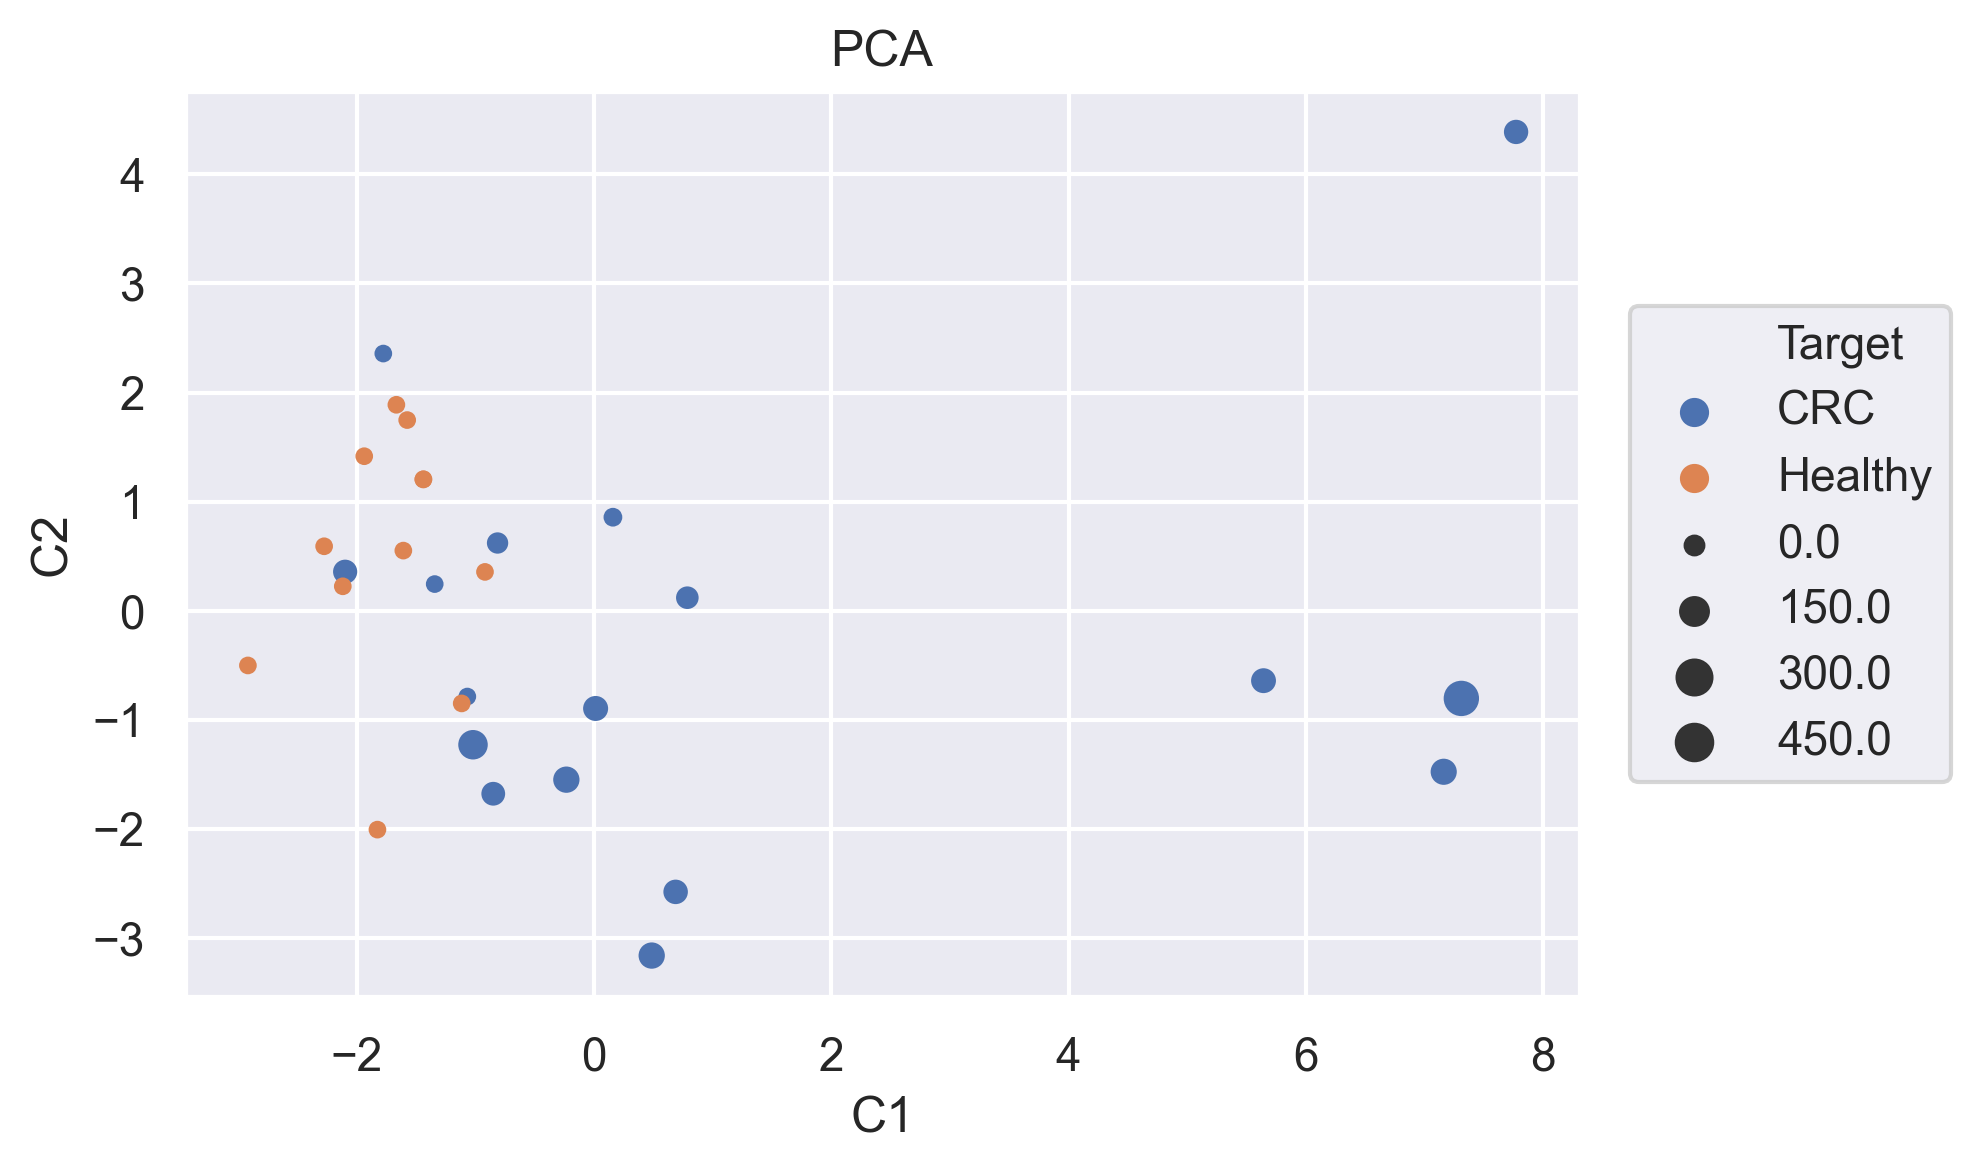

In [18]:

############### draw ######################

import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
mpl.rcParams['figure.dpi']= 300

tumlist=Xtumor.tolist()
tumzz=[x*100 for x in tumlist]
tumzz=[x+10 for x in tumzz]

g=sns.scatterplot(x=projected[:, 0], y=projected[:, 1], hue=Y,edgecolor='none',size=tumzz)

g.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)
plt.title(whichdecomp)

plt.xlabel('C1')
plt.ylabel('C2')


savename=dfname+"_"+whichdecomp+"_tumorratio.pdf"
plt.savefig(savename,dpi=300,bbox_inches="tight")
plt.show()



(29,)
(29,)
[336.4705882, 10.0, 23.5802469, 141.94444439999998, 119.0909091, 110.0, 78.87417219999999, 10.0, 10.0, 142.0, 204.2675159, 59.6296296, 139.33333330000002, 107.24137929999999, 116.79611650000001, 104.3396226, 98.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


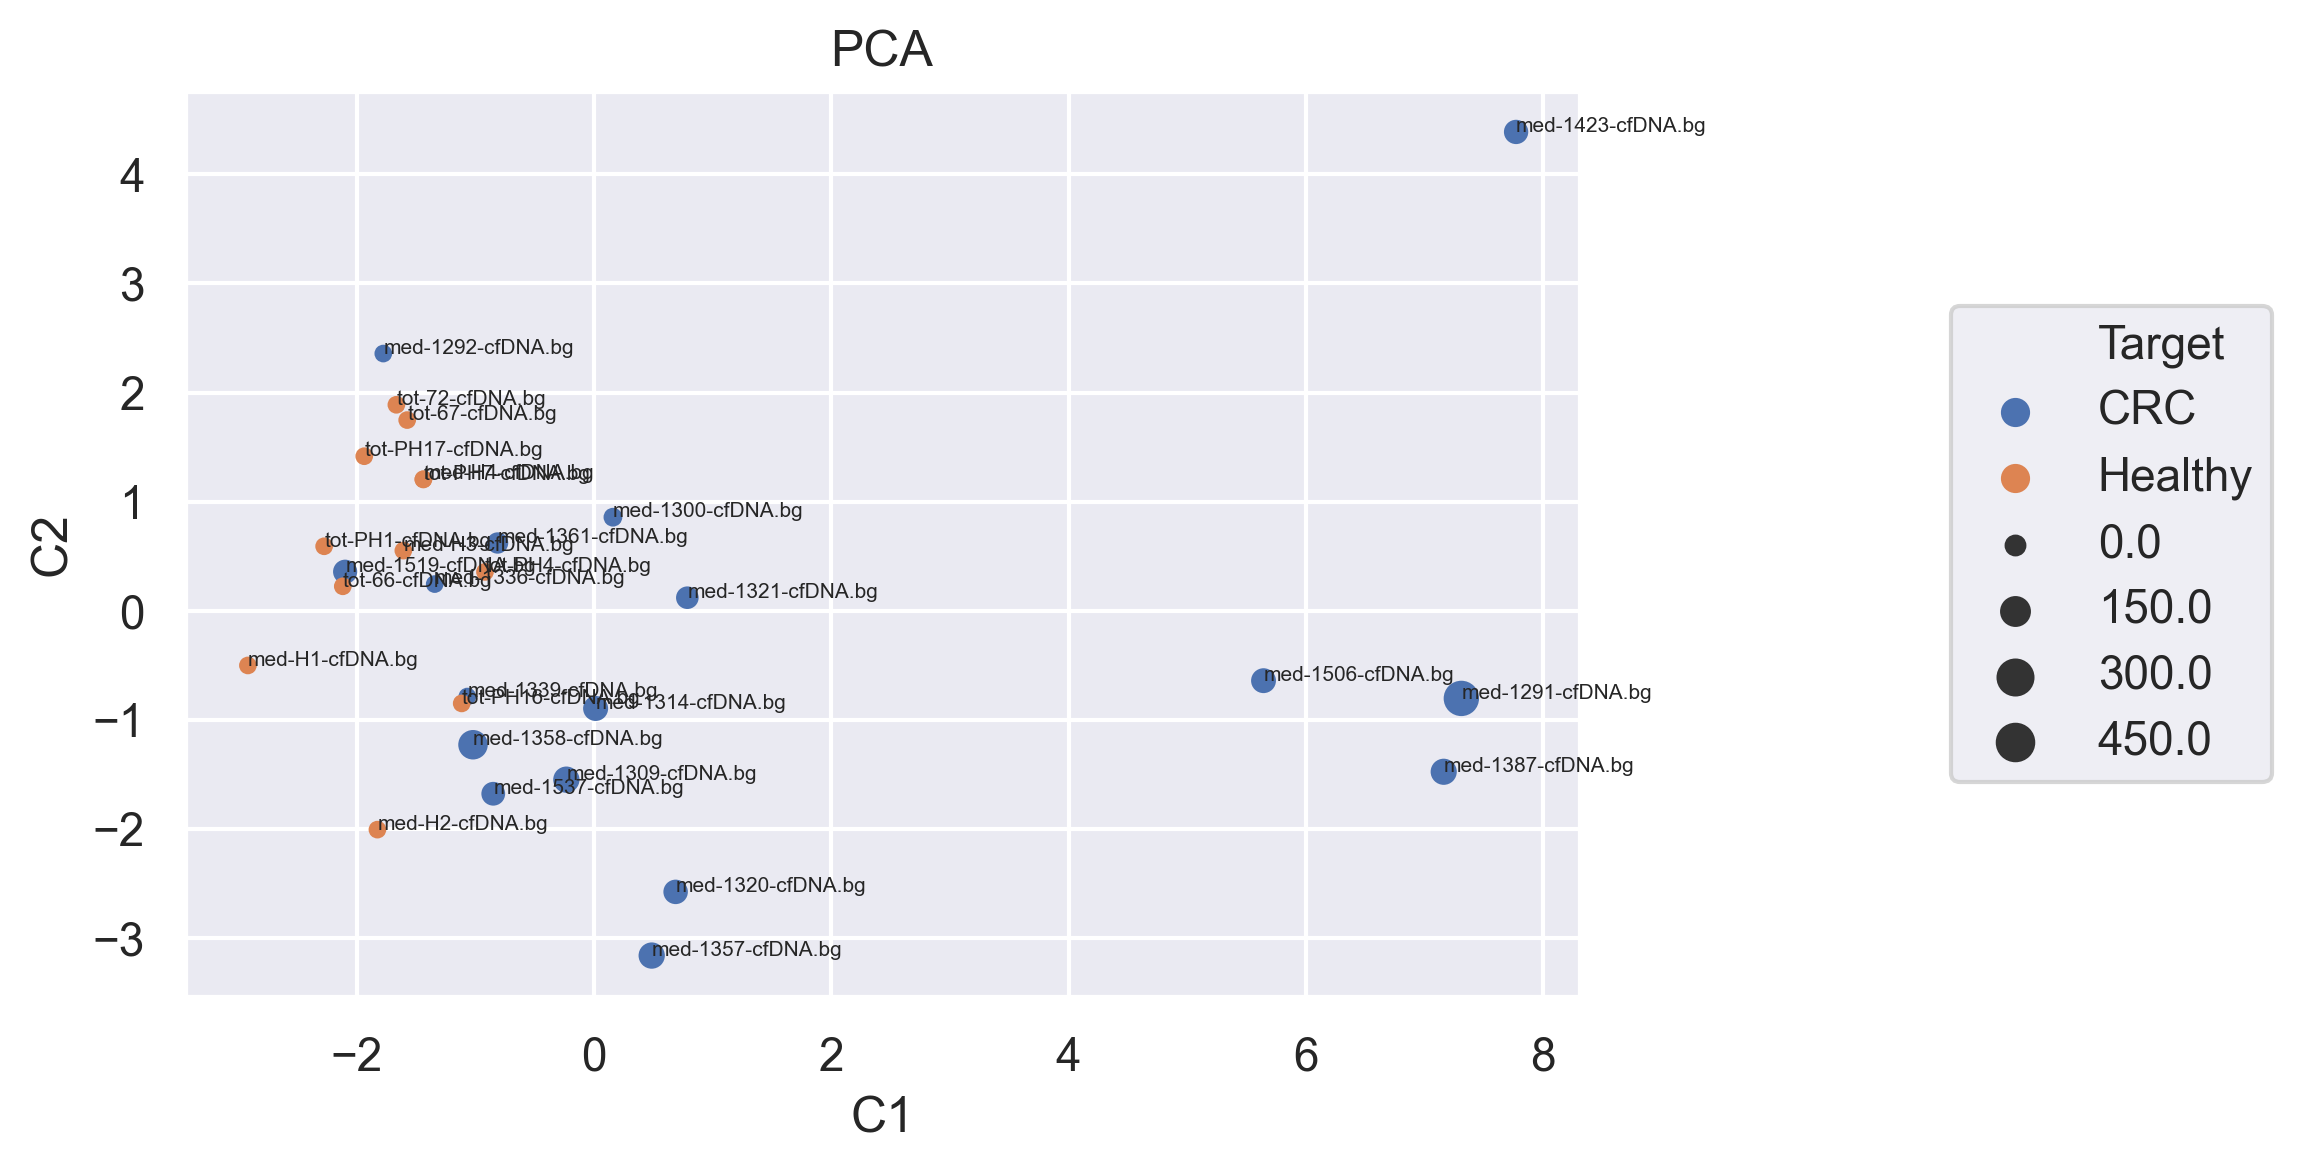

In [19]:
mpl.rcParams['figure.dpi']= 300

#fig, ax = plt.subplots()
listttt=Xtumor.tolist()
zz=[x*100 for x in listttt]
zz=[x+10 for x in zz]
g=sns.scatterplot(x=projected[:, 0], y=projected[:, 1], hue=Y,edgecolor='none',size=zz)

g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title(whichdecomp)

for i in range(projected[:, 0].shape[0]):
    
    g.text(projected[i, 0], projected[i, 1], X.index[i],fontsize=5)


plt.xlabel('C1')
plt.ylabel('C2')

print(projected[:, 0].shape)
print(projected[:, 1].shape)


savename_samplename=dfname+"_"+whichdecomp+"_tumorratio_sample_name.pdf"
plt.savefig(savename_samplename,dpi=300,bbox_inches="tight")


print(zz)

plt.show()

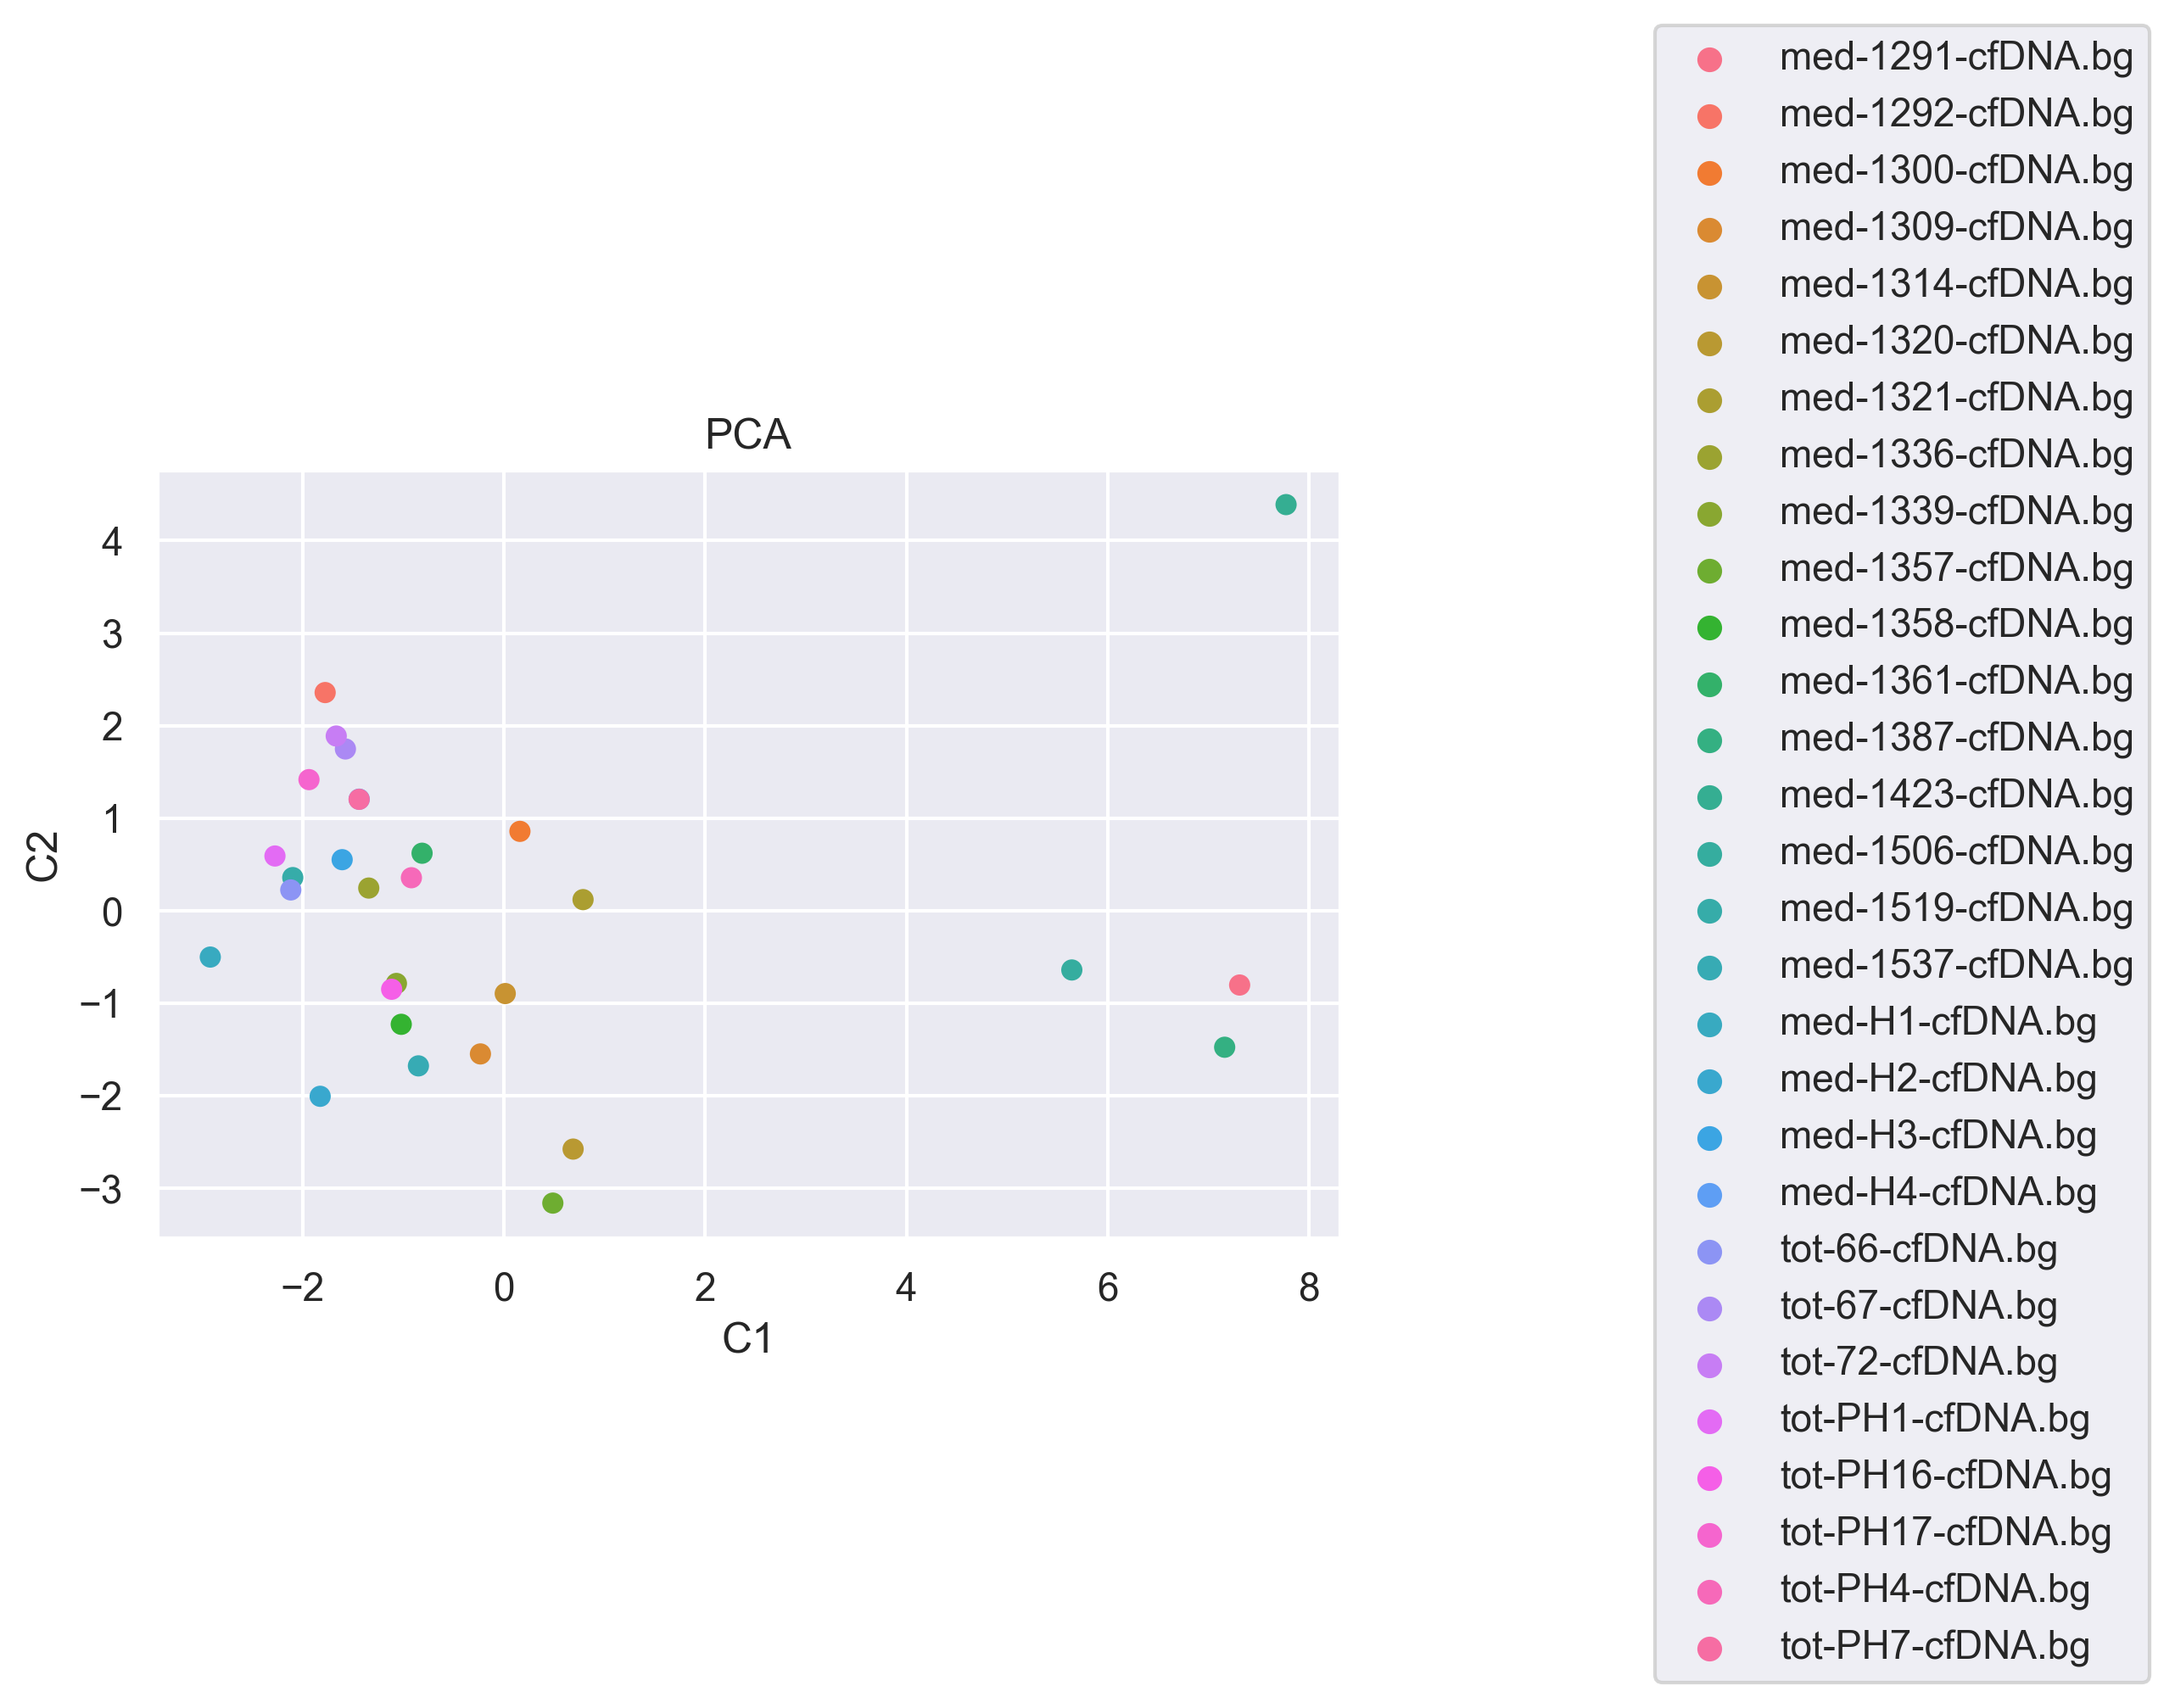

In [20]:

mpl.rcParams['figure.dpi']= 300
g=sns.scatterplot(x=projected[:, 0], y=projected[:, 1], hue=X.index,edgecolor='none')

g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title(whichdecomp)

plt.xlabel('C1')
plt.ylabel('C2')



plt.show()